In [10]:
import sys
import warnings
import pandas as pd
import src.features.labeller as lab
import src.features.bars as bar

from pathlib import PurePath

from src.utils.utils import get_relative_project_dir, cprint

warnings.filterwarnings("ignore")

print('Python %s on %s' % (sys.version, sys.platform))

pdir = get_relative_project_dir('FinML', partial=False)
# for notebook references
sys.path.extend([pdir])
print(pdir)

data_dir = pdir / 'data'
data_raw_dir = data_dir / 'raw'
data_interim_dir = data_dir / 'interim'
data_processed_dir = data_dir / 'processed'

file_name = 'IVE_dollarValue_resampled_1s_cross_train_label'
file_ext = '.parq'

parq_file_name = file_name + file_ext
# Load from parquet
infp = PurePath(data_processed_dir / parq_file_name)

df = pd.read_parquet(infp)

cprint(df)






Python 3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] on darwin
/Users/scottblunsden/Programs/FinML
-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                          ret  bin  side
2016-07-07 14:28:00 -0.018703  0.0    -1
2016-07-08 09:30:57  0.010571  1.0     1
2018-02-06 10:18:08 -0.026702  0.0    -1
2018-02-07 15:28:09 -0.030792  0.0     1
2018-02-13 09:30:00 -0.001803  0.0    -1
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102 entries, 2009-10-29 13:40:22 to 2018-02-13 09:30:00
Data columns (total 3 columns):
ret     102 non-null float64
bin     102 non-null float64
side    102 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.2 KB
None
----------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        24
         1.0       0.53      1.00      0.69        27

   micro avg       0.53      0.53      0.53        51
   macro avg       0.26      0.50      0.35        51
weighted avg       0.28      0.53      0.37        51



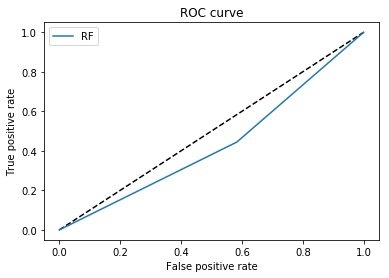

In [11]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report

RANDOM_STATE = 777

#training data
X = df.side.values.reshape(-1,1)
#labels
y = df.bin.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    shuffle=False)

n_estimator = 10000
rf = RandomForestClassifier(max_depth=2, n_estimators=n_estimator,
                            criterion='entropy', random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()